# Mechanisms of Replication Fork Model
## Ghanendra Singh and Dr. Sriram K.
### Center for Computational Biology, IIIT Delhi

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from scipy.optimize import fsolve
from sympy import*
import scipy.stats as st
import pandas as pd
import matplotlib.image as mpimg

## Replication Fork Model 

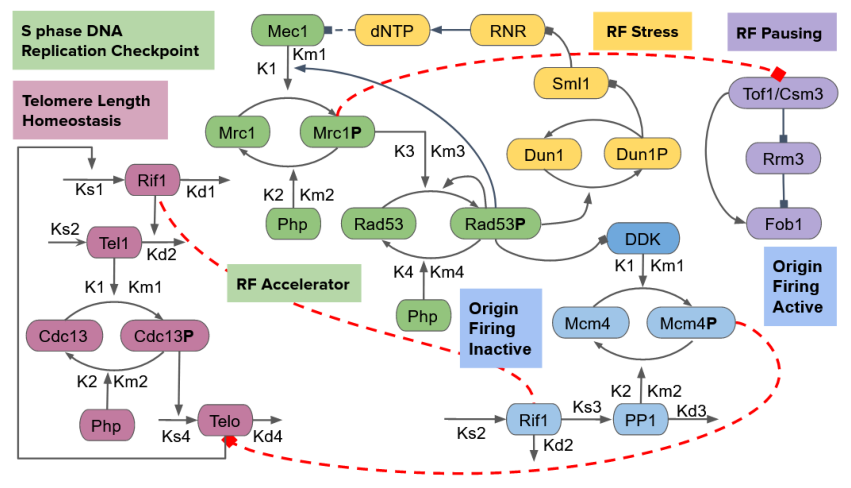

In [2]:
img = mpimg.imread('RF_Images/RFM_complete_2.PNG')
plt.figure(figsize=(15,15))
plt.axis('off')
imgplot = plt.imshow(img)

### Replication Fork Accelerator Model

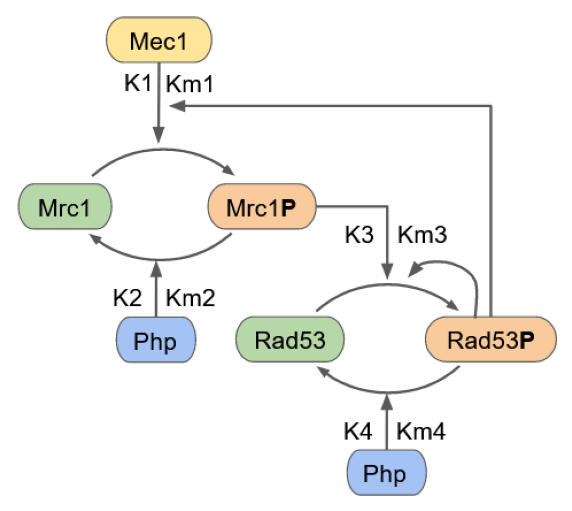

In [3]:
img = mpimg.imread('RF_Images/rfs_simple_ckt_2.PNG')
plt.figure(figsize=(10,10))
plt.axis('off')
imgplot = plt.imshow(img)

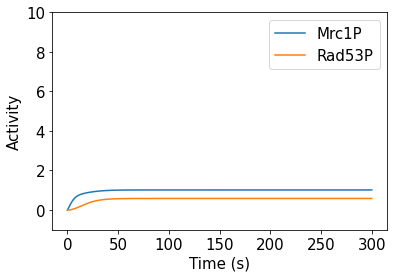

In [4]:
# Function for replication fork accelerator model
def rf_accelerator(x,t):
    
    Mrc1p = x[0]
    Rad53p = x[1]
    #ODEs
    dMrc1pdt = k1*Mec1*(Mrc1T - Mrc1p)**n/(Km1**n + (Mrc1T-Mrc1p)**n) - k2*Pph3*Mrc1p**n/(Km2**n + Mrc1p**n) + k6*Rad53p*(Mrc1T - Mrc1p)**n/((Km6**n + (Mrc1T - Mrc1p)**n))
    dRad53pdt = k3*Mrc1p*(Rad53T - Rad53p)**m/(Km3**m + (Rad53T - Rad53p)**m) - k4*Pph3*Rad53p**m/(Km4**m + Rad53p**m) + k5*(Rad53T-Rad53p)*Rad53p**m/(Km5**m + Rad53p**m)
    
    return dMrc1pdt,dRad53pdt


#Parameters
k1 = 0.05
k2 = 0.03
k3 = 0.03
k4 = 0.02
k5 = 0.1
k6 = 0.1

Km1 = 1.0
Km2 = 1.0
Km3 = 1.0
Km4 = 1.0
Km5 = 4.0
Km6 = 4.0

ks = 1
kd = 0.1

Mrc1T = 10
Rad53T = 10
Pph3 = 10
n = 3
m = 3

# Low Mec1 signal
Mec1 = 2

#Initial conditions
mrc1_i = 0
rad53_i = 0
init = [mrc1_i,rad53_i]

#Time
t = np.linspace(0,300,1000)
#Integrate system of ODEs
z = odeint(rf_accelerator,init,t)

#Plot
plt.plot(t,z[:,0],label='Mrc1P')
plt.plot(t,z[:,1],label='Rad53P')
plt.xlabel('Time (s)',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'upper right',fontsize='15')
plt.ylim([-1,10])
plt.show()


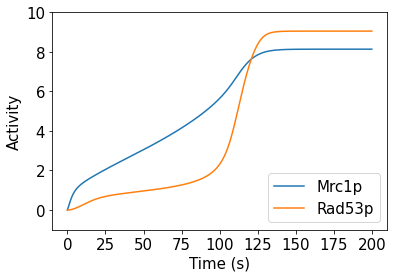

In [5]:
#High Mec1 signal
Mec1 = 5
#Initial conditions
mrc1_i = 0
rad53_i = 0
init = [mrc1_i,rad53_i]
#Time
t = np.linspace(0,200,1000)
#Integrate system of ODEs
z = odeint(rf_accelerator,init,t)
#Plot
plt.plot(t,z[:,0],label='Mrc1p')
plt.plot(t,z[:,1],label='Rad53p')
plt.xlabel('Time (s)',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'lower right',fontsize='15')
plt.ylim([-1,10])
plt.show()

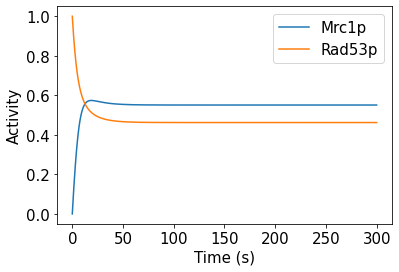

In [6]:
# No Mec1 input signal, and rad53 signal is below a certain threshold
Mec1 = 0
rad53_i = 1 # Low Rad53P Signal
#Initial condition
mec1_i = 0
mrc1_i = 0
init = [mrc1_i,rad53_i]
t = np.linspace(0,300,1000)
z = odeint(rf_accelerator,init,t)
plt.plot(t,z[:,0],label='Mrc1p')
plt.plot(t,z[:,1],label='Rad53p')
#plt.title('No Input (Mec1)=%d and Rad53p=%d'%(Mec1,rad53_i),fontsize='15')
plt.xlabel('Time (s)',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'upper right',fontsize='15')
plt.show()

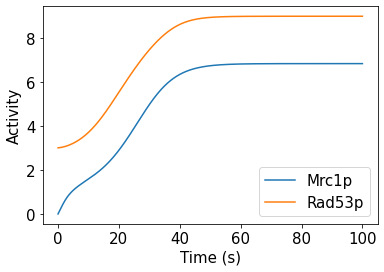

In [8]:
# No Mec1 input signal, and rad53 signal above a threshold
Mec1 = 0
rad53_i = 3 # High Rad53P Signal
mrc1_i = 0
init = [mrc1_i,rad53_i]
t = np.linspace(0,100,1000)
z = odeint(rf_accelerator,init,t)
plt.plot(t,z[:,0],label='Mrc1p')
plt.plot(t,z[:,1],label='Rad53p')
#plt.plot(t,z[:,2],label='Mec1')
#plt.title('No Input (Mec1)=%d and Rad53p=%d'%(Mec1,rad53_i),fontsize='15')
plt.xlabel('Time (s)',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'lower right',fontsize='15')
plt.show()

## Phase plane analysis

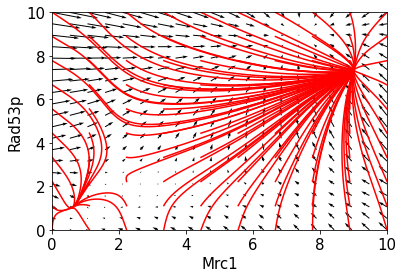

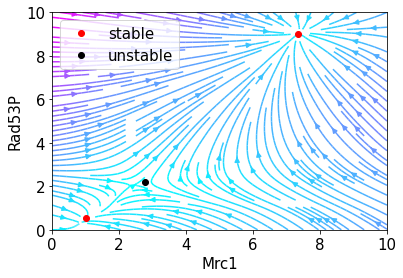

In [14]:
Mec1 = 2
ts = np.linspace(0,100,1000)
mrc1_ls = np.linspace(0,10,10)
radp_ls = np.linspace(0,10,10)

for mrc0 in mrc1_ls:
    for radp0 in radp_ls:
        z = odeint(rf_accelerator,[mrc0,radp0],ts)
        plt.plot(z[:,1],z[:,0],'-r')
                

def RF_ss(x):
    X,Y = x
    e1 = k1*Mec1*(Mt-X)**n/(Km1**n  + (Mt - X)**n) - k2*(Pph3)*X**n/(Km2**n + X**n) + k6*Y*(Mt - X)**m/((Km6**m + (Mt - X)**m))
    e2 = k3*X*(Rt-Y)/(Km3  + (Rt - Y)) - k4*(Pph3)*Y**m/(Km4**m + Y**m)  + k5*(Rt-Y)*Y**m/(Km5**m + Y**m)
    return [e1,e2]
            
        
### Phase plane analysis
X, Y = np.mgrid[0:10:20j, 0:10:20j]
Mt = Mrc1T
Rt = Rad53T

e1 = k1*Mec1*(Mt-X)**n/(Km1**n  + (Mt - X)**n) - k2*(Pph3)*X**n/(Km2**n + X**n) + k6*Y*(Mt - X)**m/((Km6**m + (Mt - X)**m))
e2 = k3*X*(Rt-Y)/(Km3  + (Rt - Y)) - k4*(Pph3)*Y**m/(Km4**m + Y**m)  + k5*(Rt-Y)*Y**m/(Km5**m + Y**m)
#Plot the vectorfield.
plt.quiver(X, Y, e1, e2)
plt.xlim([0,10])
plt.ylim([0,10])
#plt.title('Bifurcation')
plt.xlabel('Mrc1',fontsize=15)
plt.ylabel('Rad53p',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

sol1= fsolve(RF_ss, [1,1])
plt.plot(sol1[0],sol1[1], 'ro',label='stable')    
sol2= fsolve(RF_ss, [5,5])
plt.plot(sol2[0],sol2[1], 'ro')
sol3= fsolve(RF_ss, [3,3])
plt.plot(sol3[0],sol3[1], 'ko',label='unstable')


e1 = k1*Mec1*(Mt-X)**n/(Km1**n  + (Mt - X)**n) - k2*(Pph3)*X**n/(Km2**n + X**n) + k6*Y*(Mt - X)**m/((Km6**m + (Mt - X)**m))
e2 = k3*X*(Rt-Y)/(Km3  + (Rt - Y)) - k4*(Pph3)*Y**m/(Km4**m + Y**m)  + k5*(Rt-Y)*Y**m/(Km5**m + Y**m)

#Null clines
#plt.figure()
# plot nullclines
#Mrc1p_ss = ((Km3/Rt + (1-Rp/Rt))/(k3*(1-Rp/Rt)))*(k4*Php3*Rp/Rt/(Km4/Rt + Rp/Rt) - (k6*Rp*(1-Rp/Rt))/(Km6/Rt + (1-Rp/Rt)))
#Rad53p_ss = ((Km5/Mt + (1-Mp/Mt))/(k5*(1-Mp/Mt)))*((k2*Php3*Mp/Mt)/(Km2/Mt + Mp/Mt) - (k1*Mec1*(1-Mp/Mt))/(Km/Mt + (1-Mp/Mt)))

#plt.plot(Mrc1p_ss,Rp, 'r',label='Telo_1')
#plt.plot(Rad53p_ss,, 'k',label='Telo_2')


# find and plot direction arrows (dP, dM)
M, R= np.meshgrid(mrc1_ls, radp_ls)
dM, dR= rf_accelerator([M, R], 0.0)
# calculate magnitude of total rate of change
norm= np.sqrt(dM**2 + dR**2)
# colour of direction arrow is magnitude of total rate of change
plt.streamplot(M, R, dM, dR, color= norm, cmap= plt.cm.cool, density= 1.5)
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('Mrc1',fontsize=15)
plt.ylabel('Rad53P',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left',fontsize=15)
plt.show()

## Replication Fork with DDK
### RFS + DDK --| inhibit firing of replication origins

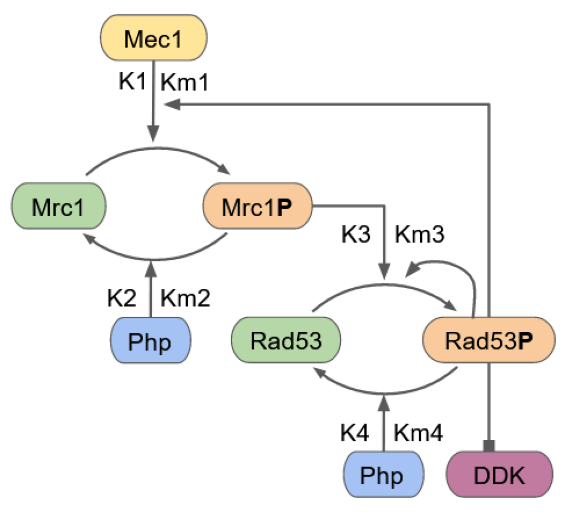

In [15]:
img = mpimg.imread('RF_Images/rfs_ckt_with_ddk.PNG')
plt.figure(figsize=(10,10))
plt.axis('off')
imgplot = plt.imshow(img)

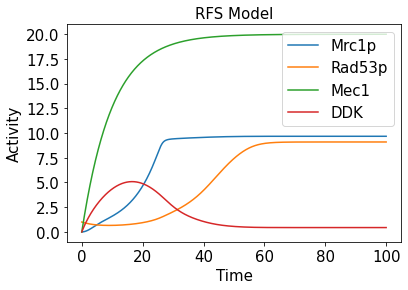

In [16]:
def rf_func_DDK(x,t):
    
    Mrc1p = x[0]
    Rad53p = x[1]
    Mec1 = x[2]
    DDK = x[3]
    dMec1dt = ka - kd*Mec1
    dMrc1pdt = k1*Mec1*(Mrc1T - Mrc1p)**n/(Km1**n + (Mrc1T-Mrc1p)**n)*Rad53p - k2*Pph3*Mrc1p**n/(Km2**n + Mrc1p**n)
    dRad53pdt = k3*Mrc1p*(Rad53T - Rad53p)**m/(Km3**m + (Rad53T - Rad53p)**m) - k4*Pph3*Rad53p**m/(Km4**m + Rad53p**m) + k5*(Rad53T-Rad53p)*Rad53p**m/(Km5**m + Rad53p**m)
    dDDKdt = ka2 - kd2*DDK*Rad53p
    return dMrc1pdt,dRad53pdt,dMec1dt,dDDKdt


#Parameters
k1 = 0.05
k2 = 0.03
k3 = 0.03
k4 = 0.02
k5 = 0.1
Km1 = 1
Km2 = 1
Km3 = 1
Km4 = 1
Km5 = 5

ka = 2#*  # add replicaiton stress
kd = 0.1
ka2 = 0.8
kd2 = 0.2

Mec1 = 10
Mrc1T = 10
Rad53T = 10
Pph3 = 10
n = 3
m = 3

#Initial conditions
mrc1_i = 0
rad53_i = 1
mec1_i = 0
ddk_i = 0
init = [mrc1_i,rad53_i,mec1_i,ddk_i]
#Time
t = np.linspace(0,100,1000)
#Integrate ODEs
z = odeint(rf_func_DDK,init,t)
#Plot
plt.plot(t,z[:,0],label='Mrc1p')
plt.plot(t,z[:,1],label='Rad53p')
plt.plot(t,z[:,2],label='Mec1')
plt.plot(t,z[:,3],label='DDK')
plt.title('RFS Model',fontsize='15')
plt.xlabel('Time',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'upper right',fontsize='15')
plt.show()

## Stochastic simulation of RFS braking model

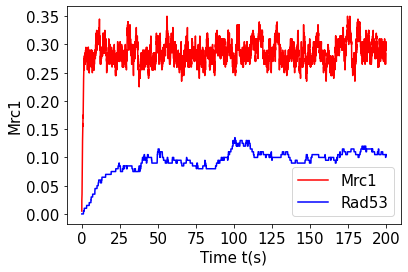

In [17]:
# Gillespie Algorithm
# dMrc1pdt = k1*Mec1*(Mrc1T - Mrc1p)**n/(Km1**n + (Mrc1T-Mrc1p)**n)*Rad53p - k2*Pph3*Mrc1p**n/(Km2**n + Mrc1p**n)
# dRad53pdt = k3*Mrc1p*(Rad53T - Rad53p)**m/(Km3**m + (Rad53T - Rad53p)**m)*Rad53p - k4*Pph3*Rad53p**m/(Km4**m + Rad53p**m)

def stoc_rfv():
    
    #Parameters
    k1 = 0.05
    k2 = 0.03
    k3 = 0.03
    k4 = 0.02
    k5 = 0.1
    k6 = 0.1

    Km1 = 1.1
    Km2 = 1.1
    Km3 = 1.1
    Km4 = 1.1
    Km5 = 4.0
    Km6 = 4.0

    Mec1 = 10
    Mrc1T = 200
    Rad53T = 200
    Pph3 = 200
    n = 3
    m = 3

    #Init
    Mrc1p = 0
    Rad53p = 0

    T = 200 # No. of divisions
    t = 0

    time = []
    mol_mrc1 = []
    mol_rad53p = []
    
    V = 200
    
    while t<T:
    #parameters
#dMrc1pdt = k1*Mec1*(Mrc1T - Mrc1p)**n/(Km1**n + (Mrc1T-Mrc1p)**n) - k2*Pph3*Mrc1p**n/(Km2**n + Mrc1p**n) + k6*Rad53p*(Mrc1T - Mrc1p)**m/((Km6**m + (Mrc1T - Mrc1p)**m))
#dRad53pdt = k3*Mrc1p*(Rad53T - Rad53p)**m/(Km3**m + (Rad53T - Rad53p)**m) - k4*Pph3*Rad53p**m/(Km4**m + Rad53p**m) + k5*(Rad53T-Rad53p)*Rad53p**m/(Km5**m + Rad53p**m)
    

        
        rates = [(V*k1*Mec1*(Mrc1T - Mrc1p)**n/((V*Km1)**n + (Mrc1T-Mrc1p)**n)),
                 V*k2*Pph3*Mrc1p**n/((V*Km2)**n + Mrc1p**n),
                 k6*Rad53p*(Mrc1T - Mrc1p)**m/(((V*Km6)**m + (Mrc1T - Mrc1p)**m)),
                 k3*Mrc1p*(Rad53T - Rad53p)**m/((V*Km3)**m + (Rad53T - Rad53p)**m),
                 V*k4*Pph3*Rad53p**m/((V*Km4)**m + Rad53p**m),
                 k5*(Rad53T-Rad53p)*Rad53p**m/((V*Km5)**m + Rad53p**m)
                ]
        rate_sum = sum(rates)

        #tau = np.random.exponential(scale=1/rate_sum)
        tau = -np.log(np.random.uniform(0,1))/rate_sum

        #time point of next event
        t+=tau

        # rxn selection
        r = np.random.rand()*rate_sum

        #production
        if (r>0 and r<rates[0]):
            Mrc1p +=1
        elif (r>rates[0] and r<sum(rates[0:2])):
            Mrc1p -=1
        elif (r>rates[1] and r<sum(rates[0:3])):
            Mrc1p -=1
        elif (r>rates[2] and r<sum(rates[0:4])):
            Rad53p +=1            
        elif (r>rates[3] and r<sum(rates[0:5])):
            Rad53p -=1            
        elif (r>rates[4] and r<sum(rates)):
            Rad53p +=1
        
        time.append(t)
        mol_mrc1.append(Mrc1p/V)
        mol_rad53p.append(Rad53p/V)
    
    plt.plot(time,mol_mrc1,'r',label='Mrc1')
    plt.plot(time,mol_rad53p,'b',label='Rad53')
    
    plt.xlabel('Time t(s)',fontsize='15')
    plt.ylabel('Mrc1',fontsize='15')
    #plt.title('Figure 1.C Stochastic Simulation')
    plt.legend(fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

stoc_rfv()

# Equations

$$ \frac{dMrc1_p}{dt}=\frac {k_1\ast Mec1 \ast (Mrc1_T - Mrc1_p)}{Km_1 + (Mrc1_T - Mrc1_p)} - \frac {k_2 \ast Pph_3 \ast Mrc1_p }{Km_2 + Mrc1_p} + \frac {k_5 \ast (Mrc1_T - Mrc1_p) \ast Rad53_p^n }{Km_5^n + (Mrc1_T - Mrc1_p)^n} $$

$$ \frac{dRad53_p}{dt}=\frac {k_3\ast Mrc1 \ast (Rad53_T - Rad53_p)^n}{Km_3^n + (Rad53_T - Rad53_p)^n} - \frac {k_4 \ast Pph_3 \ast Rad53_p^n }{Km_4^n + Rad53_p^n} + \frac {k_6 \ast (Rad53_T - Rad53_p) \ast Rad53_p^n }{Km_6^n + Rad53_p^n} $$

$$ \frac {dMec1}{dt} = k_a - k_d \ast Mec1 $$

$$ \frac {dDDK}{dt} = k_a2 - k_d2*DDK*Rad53_p $$

## Adding braking mechanism

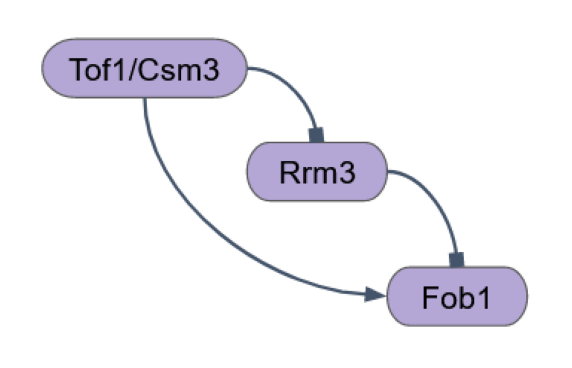

In [18]:
img = mpimg.imread('RF_Images/tof1_csm3.png')
plt.figure(figsize=(10,10))
plt.axis('off')
imgplot = plt.imshow(img)

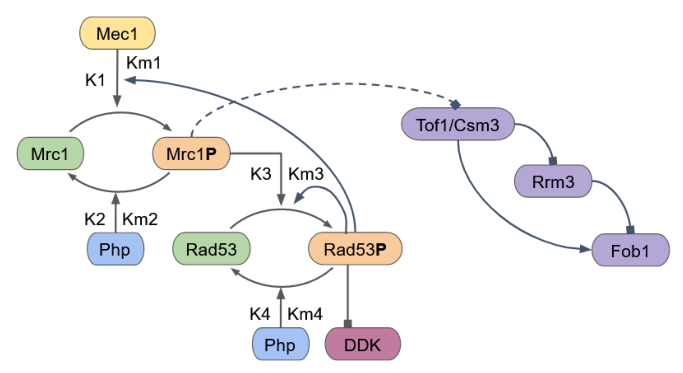

In [19]:
img = mpimg.imread('RF_Images/rf_mab_ckt.PNG')
plt.figure(figsize=(12,12))
plt.axis('off')
imgplot = plt.imshow(img)

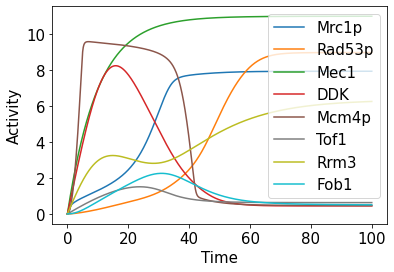

In [20]:
def rf_acc_brake(x,t):
    
    Mrc1p = x[0]
    Rad53p = x[1]
    Mec1 = x[2]
    DDK = x[3]
    
    Rif1 = x[4]
    Mcm4p = x[5]
    PP1 = x[6]
    
    Tof1 = x[7]
    Rrm3 = x[8]
    Fob1 = x[9]    
    


    dMec1dt = ka - kd*Mec1
    dMrc1pdt = k1*Mec1*(Mrc1T - Mrc1p)**n/(Km1**n + (Mrc1T-Mrc1p)**n) - k2*Pph3*Mrc1p**n/(Km2**n + Mrc1p**n) + k6*Rad53p*(Mrc1T - Mrc1p)**m/((Km6**m + (Mrc1T - Mrc1p)**m))
    dRad53pdt = k3*Mrc1p*(Rad53T - Rad53p)**m/(Km3**m + (Rad53T - Rad53p)**m) - k4*Pph3*Rad53p**m/(Km4**m + Rad53p**m) + k5*(Rad53T-Rad53p)*Rad53p**m/(Km5**m + Rad53p**m)
    dDDKdt = ka2 - kd2*DDK*Rad53p

    dRif1dt = ka3 - kd3*Rif1
    dMcm4pdt = k1*DDK*(Mcm4T - Mcm4p)**n/(Km1**n + (Mcm4T - Mcm4p)**n) - k2*PP1*Mcm4p**n/(Km2**n + Mcm4p**n)
    dPP1dt = ka4*Rif1 - kd4*PP1
    
    dTof1dt = kp1 - bd1*Tof1*Mrc1p
    dRrm3dt = kp2 - bd2*Rrm3*Tof1
    dFob1dt = kp3*Tof1 - bd3*Fob1*Rrm3

    
    return dMrc1pdt,dRad53pdt,dMec1dt,dDDKdt,dRif1dt,dMcm4pdt,dPP1dt,dTof1dt,dRrm3dt,dFob1dt

#Parameters
k1 = 0.05
k2 = 0.03
k3 = 0.03
k4 = 0.02
k5 = 0.1
k6 = 0.1

Km1 = 1.1
Km2 = 0.1
Km3 = 1.1
Km4 = 1.1
Km5 = 4.0
Km6 = 4.0

# ks = 1
# kd = 0.1

# Mec1 = 2
# Mrc1T = 10
# Rad53T = 10
# Pph3 = 10
# n = 3
# m = 3
# mrc1_i = 0
# rad53_i = 0
# mec1_i = 0




ka = 1.1#*  # add replicaiton stress
kd = 0.1
ka2 = 0.8
kd2 = 0.2

Mec1 = 10
Mrc1T = 10
Rad53T = 10
Pph3 = 10
n = 3
m = 3
mrc1_i = 0
rad53_i = 0
mec1_i = 0
ddk_i = 0

#parameters
ka3 = 0.2
kd3 = 0.1
ka4 = 0.1
kd4 = 0.04
n = 3
k1 = 1
k2 = 1
Km1 = 1
Km2 = 1

Mcm4T = 10
rif1_i = 0
Mcm4p_i = 0
PP1_i = 0

#braking params
kp1 = 0.1
bd1 = 0.02
kp2 = 0.4
bd2 = 0.1
kp3 = 0.2
bd3 = 0.04

tof1_i = 0
rrm3_i = 0
fob1_i = 0

init = [mrc1_i,rad53_i,mec1_i,ddk_i,rif1_i,Mcm4p_i,PP1_i,tof1_i,rrm3_i,fob1_i]
t = np.linspace(0,100,1000)
z = odeint(rf_acc_brake,init,t)
plt.plot(t,z[:,0],'C0',label='Mrc1p')
plt.plot(t,z[:,1],'C1',label='Rad53p')
plt.plot(t,z[:,2],'C2',label='Mec1')
plt.plot(t,z[:,3],'C3',label='DDK')
#plt.plot(t,z[:,4],'C4',label='Rif1')
plt.plot(t,z[:,5],'C5',label='Mcm4p')
#plt.plot(t,z[:,6],'C6',label='PP1')
plt.plot(t,z[:,7],'C7',label='Tof1')
plt.plot(t,z[:,8],'C8',label='Rrm3')
plt.plot(t,z[:,9],'C9',label='Fob1')

#plt.title('RFS Braking Mechanism',fontsize='15')
plt.xlabel('Time',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'upper right',fontsize='15')
plt.show()

## Addition of Dun1 Kinase

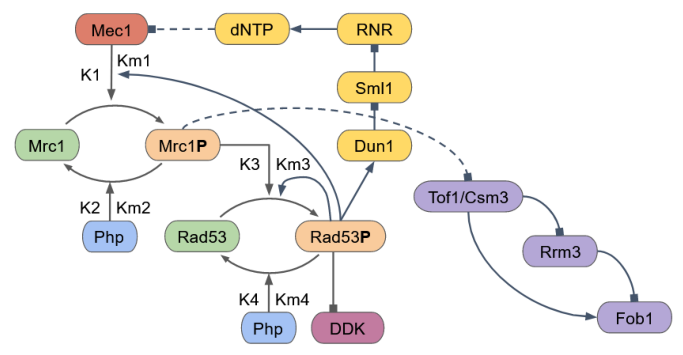

In [21]:
img = mpimg.imread('RF_Images/RF_mab_model.PNG')
plt.figure(figsize=(12,12))
plt.axis('off')
imgplot = plt.imshow(img)

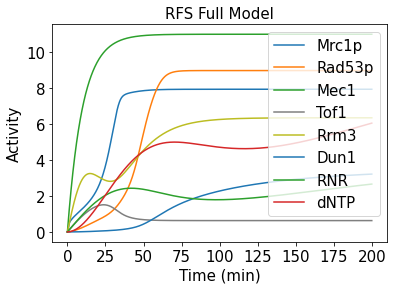

In [22]:
def rf_Dun1(x,t):
    
    Mrc1p= x[0]
    Rad53p= x[1]
    Mec1 = x[2]
    DDK = x[3]
    
    Rif1 = x[4]
    Mcm4p = x[5]
    PP1 = x[6]
    
    Tof1 = x[7]
    Rrm3 = x[8]
    Fob1 = x[9]    
    Dun1p= x[10]
    Sml1 = x[11]
    RNR =  x[12]
    dNTP = x[13]


    dMec1dt = ka - kd*Mec1
    dMrc1pdt = k1*Mec1*(Mrc1T - Mrc1p)**n/(Km1**n + (Mrc1T-Mrc1p)**n) - k2*Pph3*Mrc1p**n/(Km2**n + Mrc1p**n) + k6*Rad53p*(Mrc1T - Mrc1p)**m/((Km6**m + (Mrc1T - Mrc1p)**m))
    dRad53pdt = k3*Mrc1p*(Rad53T - Rad53p)**m/(Km3**m + (Rad53T - Rad53p)**m) - k4*Pph3*Rad53p**m/(Km4**m + Rad53p**m) + k5*(Rad53T-Rad53p)*Rad53p**m/(Km5**m + Rad53p**m)
    dDDKdt = ka2 - kd2*DDK*Rad53p

    dRif1dt = ka3 - kd3*Rif1
    dMcm4pdt = k1*DDK*(Mcm4T - Mcm4p)**n/(Km1**n + (Mcm4T - Mcm4p)**n) - k2*PP1*Mcm4p**n/(Km2**n + Mcm4p**n)
    dPP1dt = ka4*Rif1 - kd4*PP1
    
    dTof1dt = kp1 - bd1*Tof1*Mrc1p
    dRrm3dt = kp2 - bd2*Rrm3*Tof1
    dFob1dt = kp3*Tof1 - bd3*Fob1*Rrm3

    dDun1pdt = k7*Rad53p*(Dun1T-Dun1p)/(Km7 + (Dun1T-Dun1p)) - k8*Pph3*Dun1p/(Km8+Dun1p)
    dSml1dt = ka5 - kd5*Sml1*Dun1p
    dRNRdt = ka6 - kd6*RNR*Sml1
    ddNTPdt = ka7*RNR - kd7*dNTP
    
    return dMrc1pdt,dRad53pdt,dMec1dt,dDDKdt,dRif1dt,dMcm4pdt,dPP1dt,dTof1dt,dRrm3dt,dFob1dt,dDun1pdt,dSml1dt,dRNRdt,ddNTPdt

#Parameters
k1 = 0.05
k2 = 0.03
k3 = 0.03
k4 = 0.02
k5 = 0.1
k6 = 0.1
k7 = 0.02
k8 = 0.02

Km1 = 1.1
Km2 = 0.1
Km3 = 1.1
Km4 = 1.1
Km5 = 4.0
Km6 = 4.0
Km7 = 1
Km8 = 1

# ks = 1
# kd = 0.1

# Mec1 = 2
# Mrc1T = 10
# Rad53T = 10
# Pph3 = 10
# n = 3
# m = 3
# mrc1_i = 0
# rad53_i = 0
# mec1_i = 0




ka = 1.1#*  # add replicaiton stress
kd = 0.1
ka2 = 0.8
kd2 = 0.2

Mec1 = 10
Mrc1T = 10
Rad53T = 10
Pph3 = 10
n = 3
m = 3
mrc1_i = 0
rad53_i = 0
mec1_i = 0
ddk_i = 0
sml1_i = 0
RNR_i = 0
dNTP_i = 0

#parameters
ka3 = 0.2
kd3 = 0.1
ka4 = 0.1
kd4 = 0.04
n = 3
k1 = 1
k2 = 1
Km1 = 1
Km2 = 1

Mcm4T = 10
rif1_i = 0
Mcm4p_i = 0
PP1_i = 0

#braking params
kp1 = 0.1
bd1 = 0.02
kp2 = 0.4
bd2 = 0.1
kp3 = 0.2
bd3 = 0.04

tof1_i = 0
rrm3_i = 0
fob1_i = 0

Dun1T = 10
dun1_i = 0
ka5 = 0.1
kd5 = 0.01
ka6 = 0.1
kd6 = 0.01
ka7 = 0.1
kd7 = 0.04

init = [mrc1_i,rad53_i,mec1_i,ddk_i,rif1_i,Mcm4p_i,PP1_i,tof1_i,rrm3_i,fob1_i,dun1_i,sml1_i,RNR_i,dNTP_i]
t = np.linspace(0,200,1000)
z = odeint(rf_Dun1,init,t)
plt.plot(t,z[:,0],'C0',label='Mrc1p')
plt.plot(t,z[:,1],'C1',label='Rad53p')
plt.plot(t,z[:,2],'C2',label='Mec1')
#plt.plot(t,z[:,3],'C3',label='DDK')
#plt.plot(t,z[:,4],'C4',label='Rif1')
#plt.plot(t,z[:,5],'C5',label='Mcm4p')
#plt.plot(t,z[:,6],'C6',label='PP1')
plt.plot(t,z[:,7],'C7',label='Tof1')
plt.plot(t,z[:,8],'C8',label='Rrm3')
#plt.plot(t,z[:,9],'C9',label='Fob1')
plt.plot(t,z[:,10],'C10',label='Dun1')
#plt.plot(t,z[:,11],'C11',label='Sml1')
plt.plot(t,z[:,12],'C12',label='RNR')
plt.plot(t,z[:,13],'C13',label='dNTP')

plt.title('RFS Full Model',fontsize='15')
plt.xlabel('Time (min)',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'upper right',fontsize='15')
plt.show()

## With dnTp as negative regulation of Mec1.
* Possibility of a oscillator may be or not, mathematically need to find it by changing the variables.

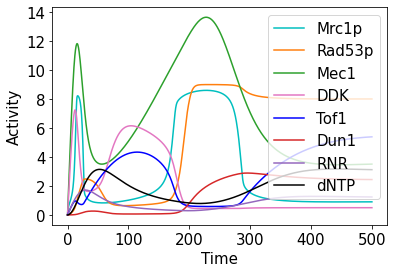

In [23]:
def rf_dNTP(x,t):
    
    Mrc1p= x[0]
    Rad53p= x[1]
    Mec1 = x[2]
    DDK = x[3]
    
    Rif1 = x[4]
    Mcm4p = x[5]
    PP1 = x[6]
    
    Tof1 = x[7]
    Rrm3 = x[8]
    Fob1 = x[9]    
    Dun1p= x[10]
    Sml1 = x[11]
    RNR =  x[12]
    dNTP = x[13]
    Rfs =  x[14]

    dMec1dt = ka - kd*Mec1*dNTP
    dMrc1pdt = k1*Mec1*(Mrc1T - Mrc1p)**n/(Km1**n + (Mrc1T-Mrc1p)**n) - k2*Pph3*Mrc1p**n/(Km2**n + Mrc1p**n) + k6*Rad53p*(Mrc1T - Mrc1p)**m/((Km6**m + (Mrc1T - Mrc1p)**m))
    dRad53pdt = k3*Mrc1p*(Rad53T - Rad53p)**m/(Km3**m + (Rad53T - Rad53p)**m) - k4*Pph3*Rad53p**m/(Km4**m + Rad53p**m) + k5*(Rad53T-Rad53p)*Rad53p**m/(Km5**m + Rad53p**m)
    dDDKdt = ka2 - kd2*DDK*Rad53p

    dRif1dt = ka3 - kd3*Rif1
    dMcm4pdt = k1*DDK*(Mcm4T - Mcm4p)**n/(Km1**n + (Mcm4T - Mcm4p)**n) - k2*PP1*Mcm4p**n/(Km2**n + Mcm4p**n)
    dPP1dt = ka4*Rif1 - kd4*PP1
    
    dTof1dt = kp1 - bd1*Tof1*Mrc1p
    dRrm3dt = kp2 - bd2*Rrm3*Tof1
    dFob1dt = kp3 - bd3*Fob1*Rrm3

    dDun1pdt = k7*Rad53p*(Dun1T-Dun1p)/(Km7 + (Dun1T-Dun1p)) - k8*Pph3*Dun1p/(Km8+Dun1p)
    dSml1dt = ka5 - kd5*Sml1*Dun1p
    dRNRdt = ka6 - kd6*RNR*Sml1
    ddNTPdt = ka7*RNR - kd7*dNTP
    
    dRfsdt = rfs_i + 0.3*Tof1 - k1*Rfs*Mec1
    
    return dMrc1pdt,dRad53pdt,dMec1dt,dDDKdt,dRif1dt,dMcm4pdt,dPP1dt,dTof1dt,dRrm3dt,dFob1dt,dDun1pdt,dSml1dt,dRNRdt,ddNTPdt,dRfsdt

#Parameters
k1 = 0.05
k2 = 0.03
k3 = 0.03
k4 = 0.02
k5 = 0.1
k6 = 0.1
k7 = 0.02
k8 = 0.02

Km1 = 1.1
Km2 = 0.1
Km3 = 1.1
Km4 = 1.1
Km5 = 4.0
Km6 = 4.0
Km7 = 1
Km8 = 1

# ks = 1
# kd = 0.1

# Mec1 = 2
# Mrc1T = 10
# Rad53T = 10
# Pph3 = 10
# n = 3
# m = 3
# mrc1_i = 0
# rad53_i = 0
# mec1_i = 0




ka = 1.1#*  # add replicaiton stress
kd = 0.1
ka2 = 0.8
kd2 = 0.2

Mec1 = 10
Mrc1T = 10
Rad53T = 10
Pph3 = 10
n = 3
m = 3
mrc1_i = 0
rad53_i = 0
mec1_i = 0
ddk_i = 0
sml1_i = 0
RNR_i = 0
dNTP_i = 0

#parameters
ka3 = 0.2
kd3 = 0.1
ka4 = 0.1
kd4 = 0.04
n = 3
k1 = 1
k2 = 1
Km1 = 1
Km2 = 1

Mcm4T = 10
rif1_i = 0
Mcm4p_i = 0
PP1_i = 0

#braking params
kp1 = 0.1
bd1 = 0.02
kp2 = 0.4
bd2 = 0.1
kp3 = 0.2
bd3 = 0.04

tof1_i = 0
rrm3_i = 0
fob1_i = 0

rfs_i = 0.4

Dun1T = 10
dun1_i = 0
ka5 = 0.1
kd5 = 0.01
ka6 = 0.1
kd6 = 0.02
ka7 = 0.1
kd7 = 0.04

init = [mrc1_i,rad53_i,mec1_i,ddk_i,rif1_i,Mcm4p_i,PP1_i,tof1_i,rrm3_i,fob1_i,dun1_i,sml1_i,RNR_i,dNTP_i,rfs_i]
t = np.linspace(0,500,1000)
z = odeint(rf_dNTP,init,t)
plt.plot(t,z[:,0],'c',label='Mrc1p')
plt.plot(t,z[:,1],'C1',label='Rad53p')
plt.plot(t,z[:,2],'C2',label='Mec1')
plt.plot(t,z[:,3],'C6',label='DDK')
# plt.plot(t,z[:,4],'C4',label='Rif1')
# plt.plot(t,z[:,5],'C5',label='Mcm4p')
# plt.plot(t,z[:,6],'C6',label='PP1')
plt.plot(t,z[:,7],'b',label='Tof1')
#plt.plot(t,z[:,8],'C8',label='Rrm3')
#plt.plot(t,z[:,9],'C9',label='Fob1')
plt.plot(t,z[:,10],'C3',label='Dun1')
#plt.plot(t,z[:,11],'C11',label='Sml1')
plt.plot(t,z[:,12],'C4',label='RNR')
plt.plot(t,z[:,13],'k',label='dNTP')

#plt.plot(t,z[:,14],'k',label='RFS')

#plt.title('RFS Model without dNTP regulation',fontsize='15')
plt.xlabel('Time',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'upper right',fontsize='15')
plt.show()

## Replication fork with Telomere Length homeostasis model

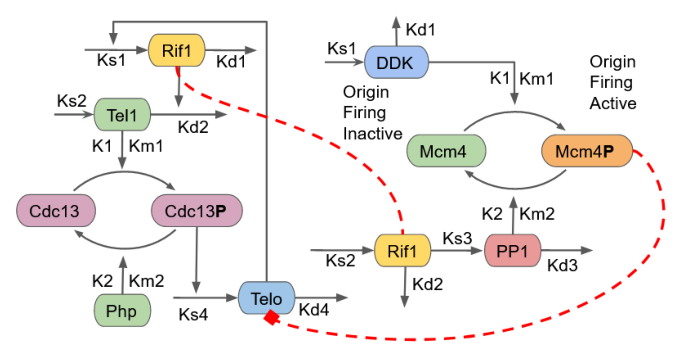

In [24]:
img = mpimg.imread('RF_Images/TLH_RF.PNG')
plt.figure(figsize=(12,12))
plt.axis('off')
imgplot = plt.imshow(img)

## Replication fork Complete Model

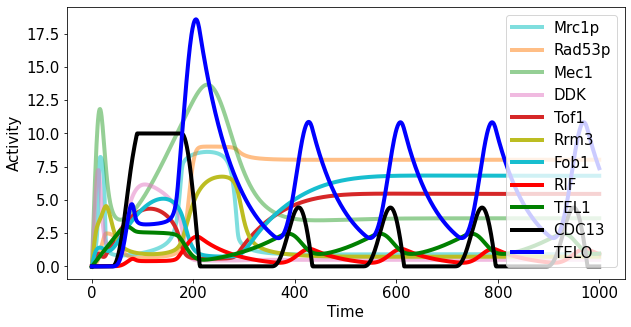

In [26]:
def rf_complete(x,t):
    
    Mrc1p= x[0]
    Rad53p= x[1]
    Mec1 = x[2]
    DDK = x[3]
    
    Rif12 = x[4]
    Mcm4p = x[5]
    PP1 = x[6]
    
    Tof1 = x[7]
    Rrm3 = x[8]
    Fob1 = x[9]    
    Dun1p= x[10]
    Sml1 = x[11]
    RNR =  x[12]
    dNTP = x[13]
    Rfs =  x[14]
    
    Rif1 = x[15]
    Tel1 = x[16]
    Cdc13p = x[17]
    Telo = x[18]


    # S phase DNA replication checkpoint
    #dMec1dt = ka - kd*Mec1 # without dNTP regulation
    dMec1dt = ka - kd*Mec1*dNTP # with dNTP regulation
    dMrc1pdt = k1*Mec1*(Mrc1T - Mrc1p)**n/(Km1**n + (Mrc1T-Mrc1p)**n) - k2*Pph3*Mrc1p**n/(Km2**n + Mrc1p**n) + k6*Rad53p*(Mrc1T - Mrc1p)**m/((Km6**m + (Mrc1T - Mrc1p)**m))
    dRad53pdt = k3*Mrc1p*(Rad53T - Rad53p)**m/(Km3**m + (Rad53T - Rad53p)**m) - k4*Pph3*Rad53p**m/(Km4**m + Rad53p**m) + k5*(Rad53T-Rad53p)*Rad53p**m/(Km5**m + Rad53p**m)
    dDDKdt = ka2 - kd2*DDK*Rad53p
    
    #DDK regulation of oris
    
    dRif12dt = ka3 - kd3*Rif12
    dMcm4pdt = k1*DDK*(Mcm4T - Mcm4p)**n/(Km1**n + (Mcm4T - Mcm4p)**n) - k2*PP1*Mcm4p**n/(Km2**n + Mcm4p**n)
    dPP1dt = ka4*Rif12 - kd4*PP1
    
    # RF pausing mechanism
    dTof1dt = kp1 - bd1*Tof1*Mrc1p
    dRrm3dt = kp2 - bd2*Rrm3*Tof1
    dFob1dt = kp3 - bd3*Fob1*Rrm3
    
    # dNTP pathway
    dDun1pdt = k7*Rad53p*(Dun1T-Dun1p)/(Km7 + (Dun1T-Dun1p)) - k8*Pph3*Dun1p/(Km8+Dun1p)
    dSml1dt = ka5 - kd5*Sml1*Dun1p
    dRNRdt = ka6 - kd6*RNR*Sml1
    ddNTPdt = ka7*RNR - kd7*dNTP
    
    # TL regulation
    dRif1dt = k0 + ts1*Telo - td1*Rif1
    dTel1dt = ts2 - td2*Tel1*Rif1
    dCdc13pdt = t1*Tel1*(Cdc13T - Cdc13p)**n/(tm1**n + (Cdc13T - Cdc13p)**n) - t2*Phy*Cdc13p**n/(tm2**n + Cdc13p**n)
    dTelodt = Cdc13p*ts3 - td3*Telo*Mcm4p
    
    
    dRfsdt = rfs_i + 0.3*Tof1 - k1*Rfs*Mec1
    
    return dMrc1pdt,dRad53pdt,dMec1dt,dDDKdt,dRif12dt,dMcm4pdt,dPP1dt,dTof1dt,dRrm3dt,dFob1dt,dDun1pdt,dSml1dt,dRNRdt,ddNTPdt,dRfsdt,dRif1dt,dTel1dt,dCdc13pdt,dTelodt


#Parameters
k1 = 0.05
k2 = 0.03
k3 = 0.03
k4 = 0.02
k5 = 0.1
k6 = 0.1
k7 = 0.02
k8 = 0.02

Km1 = 1.1
Km2 = 0.1
Km3 = 1.1
Km4 = 1.1
Km5 = 4.0
Km6 = 4.0
Km7 = 1
Km8 = 1

# ks = 1
# kd = 0.1

# Mec1 = 2
# Mrc1T = 10
# Rad53T = 10
# Pph3 = 10
# n = 3
# m = 3
# mrc1_i = 0
# rad53_i = 0
# mec1_i = 0




ka = 1.1#*  # add replicaiton stress
kd = 0.1
ka2 = 0.8
kd2 = 0.2

Mec1 = 10
Mrc1T = 10
Rad53T = 10
Pph3 = 10
n = 3
m = 3
mrc1_i = 0
rad53_i = 0
mec1_i = 0
ddk_i = 0
sml1_i = 0
RNR_i = 0
dNTP_i = 0

#parameters
ka3 = 0.2
kd3 = 0.1
ka4 = 0.1
kd4 = 0.04
n = 3
k1 = 1
k2 = 1
Km1 = 1
Km2 = 1

Mcm4T = 10
rif1_i = 0
Mcm4p_i = 0
PP1_i = 0

#braking params
kp1 = 0.1
bd1 = 0.02
kp2 = 0.4
bd2 = 0.1
kp3 = 0.2
bd3 = 0.04

tof1_i = 0
rrm3_i = 0
fob1_i = 0

rfs_i = 0.4

Dun1T = 10
dun1_i = 0
ka5 = 0.1
kd5 = 0.01
ka6 = 0.1
kd6 = 0.02
ka7 = 0.1
kd7 = 0.04


# TL params
#k0 = 0.01
# ts1 = 0.06  # keep ks1 (0.4 to 0.6) 0.5 so that the factor can be varies between (0 to 10) or (0 to 1)
# td1 = 0.02  # Amplitud
# ts2 = 0.01 # Frequency of oscillations
# td2 = 0.01 # Frequency of oscillations
# ts3 = 0.2
# td3 = 0.04 


k0 = 0.01
ts1 = 0.06  # keep ks1 (0.4 to 0.6) 0.5 so that the factor can be varies between (0 to 10) or (0 to 1)
td1 = 0.5  # Amplitud
ts2 = 0.05 # Frequency of oscillations
td2 = 0.05 # Frequency of oscillations
ts3 = 0.08
td3 = 0.03 


t1 = 0.3
t2 = 0.06
tm1 = 0.002
tm2 = 0.002
#Hill coefficient
n = 3

Phy = 10
Cdc13T = 10

rif1_i2 = 0
tel1_i = 0
cdc13p_i = 0
telo_i = 0

init = [mrc1_i,rad53_i,mec1_i,ddk_i,rif1_i,Mcm4p_i,PP1_i,tof1_i,rrm3_i,fob1_i,dun1_i,sml1_i,RNR_i,dNTP_i,rfs_i,
       rif1_i2,tel1_i,cdc13p_i,telo_i]
t = np.linspace(0,1000,1000)
z = odeint(rf_complete,init,t)

plt.figure(figsize = (10,5))

plt.plot(t,z[:,0],'c',label='Mrc1p',linewidth = 4,alpha=0.5)
plt.plot(t,z[:,1],'C1',label='Rad53p',linewidth = 4,alpha=0.5)
plt.plot(t,z[:,2],'C2',label='Mec1',linewidth = 4,alpha=0.5)
plt.plot(t,z[:,3],'C6',label='DDK',linewidth = 4,alpha=0.5)

#plt.plot(t,z[:,4],'C4',label='Rif1',linewidth = 4)
#plt.plot(t,z[:,5],'C5',label='Mcm4p',linewidth = 4,alpha=0.3)
#plt.plot(t,z[:,6],'C6',label='PP1')

plt.plot(t,z[:,7],'C3',label='Tof1',linewidth = 4)
plt.plot(t,z[:,8],'C8',label='Rrm3',linewidth = 4)
plt.plot(t,z[:,9],'C9',label='Fob1',linewidth = 4)
# plt.plot(t,z[:,10],'C11',label='Dun1',linewidth = 4)
# plt.plot(t,z[:,11],'C10',label='Sml1',linewidth = 4)
# plt.plot(t,z[:,12],'C4',label='RNR',linewidth=4)
# plt.plot(t,z[:,13],'C7',label='dNTP',linewidth = 4)

plt.plot(t,z[:,15],'r',label='RIF',linewidth = 4,alpha=1)
plt.plot(t,z[:,16],'g',label='TEL1',linewidth = 4,alpha=1)
plt.plot(t,z[:,17],'k',label='CDC13',linewidth = 4,alpha=1)
plt.plot(t,z[:,18],'b',label='TELO',linewidth = 4,alpha=1)

#plt.plot(t,z[:,14],'k',label='RFS')

#plt.title('RFS',fontsize='15')
plt.xlabel('Time',fontsize='15')
plt.ylabel('Activity',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.legend(loc = 'upper right',fontsize='15')
plt.show()